<a href="https://colab.research.google.com/github/aishwarya-ar1/Campus-Takeaway/blob/main/CustomerLifetime(EndSem).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importring necessary libraries

In [ ]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

Loading the dataset

In [ ]:
#Loading dataset
data = pd.read_excel("/content/Online Retail.xlsx")

In [ ]:
#Displaying dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Removing Duplicates

In [ ]:
#Removing duplicates
filtered_data=data[['Country','CustomerID']].drop_duplicates()

Insights of the data - Depicts top 10 country's customers

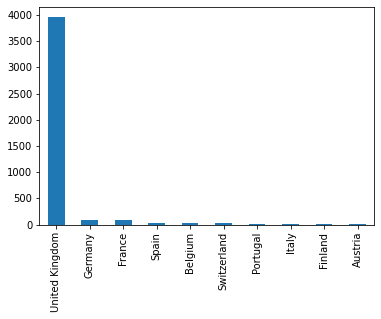

In [ ]:
#Data Insights
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [ ]:
#Filtering data for the UK
uk_data=data[data.Country=='United Kingdom']
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.0+ MB


In [ ]:
#Describe
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


Filtering required columns

In [ ]:
#Filtering quantities greater than 0
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486286 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    486286 non-null  object        
 1   StockCode    486286 non-null  object        
 2   Description  485694 non-null  object        
 3   Quantity     486286 non-null  int64         
 4   InvoiceDate  486286 non-null  datetime64[ns]
 5   UnitPrice    486286 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      486286 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.4+ MB


In [ ]:
#Filtering columns
uk_data_group=uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'UnitPrice': lambda price: price.sum()})

In [ ]:
uk_data_group.head()

,InvoiceDate,InvoiceNo,Quantity,UnitPrice
CustomerID,,,,
12346.0,0,1,74215,1.04
12747.0,366,103,1275,449.89
12748.0,372,4596,25748,12205.60
12749.0,209,199,1471,994.99
12820.0,323,59,722,112.38


In [ ]:
#Renaming the columns
uk_data_group.columns=['num_days','num_transactions','num_units','spent_money']
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money
CustomerID,,,,
12346.0,0,1,74215,1.04
12747.0,366,103,1275,449.89
12748.0,372,4596,25748,12205.60
12749.0,209,199,1471,994.99
12820.0,323,59,722,112.38


CALCULATING CLTV USING THE FORMULA 
CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.

Customer Value = Average Order Value * Purchase Frequency

In [ ]:
# Average Order Value
uk_data_group['avg_order_value']=uk_data_group['spent_money']/uk_data_group['num_transactions']

In [ ]:
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value
CustomerID,,,,,
12346.0,0,1,74215,1.04,1.040000
12747.0,366,103,1275,449.89,4.367864
12748.0,372,4596,25748,12205.60,2.655701
12749.0,209,199,1471,994.99,4.999950
12820.0,323,59,722,112.38,1.904746


PURCHASE FREQUENCY CALCULATION 

Purchase Frequency is the ratio of the total number of orders and the total number of customer. It represents the average number of orders placed by each customer.

In [ ]:
#Purchase frequency calculation
purchase_frequency=sum(uk_data_group['num_transactions'])/uk_data_group.shape[0]

CALCULATING REPEAT RATE AND CHURN RATE

In [ ]:
# Repeat Rate
repeat_rate=uk_data_group[uk_data_group.num_transactions > 1].shape[0]/uk_data_group.shape[0]

In [ ]:
churn_rate=1-repeat_rate

In [ ]:
purchase_frequency,repeat_rate,churn_rate

(90.37107880642694, 0.9818923743942872, 0.018107625605712774)

In [ ]:
# Profit Margin
uk_data_group['profit_margin']=uk_data_group['spent_money']*0.05

In [ ]:
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin
CustomerID,,,,,,
12346.0,0,1,74215,1.04,1.040000,0.0520
12747.0,366,103,1275,449.89,4.367864,22.4945
12748.0,372,4596,25748,12205.60,2.655701,610.2800
12749.0,209,199,1471,994.99,4.999950,49.7495
12820.0,323,59,722,112.38,1.904746,5.6190


In [ ]:
# Customer Value
uk_data_group['CLV']=(uk_data_group['avg_order_value']*purchase_frequency)/churn_rate

In [ ]:
#Customer Lifetime Value
uk_data_group['cust_lifetime_value']=uk_data_group['CLV']*uk_data_group['profit_margin']

PREDICTION MODEL FOR CLTV

In [ ]:
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
CustomerID,,,,,,,,
12346.0,0,1,74215,1.04,1.040000,0.0520,5190.405634,2.699011e+02
12747.0,366,103,1275,449.89,4.367864,22.4945,21799.025304,4.903582e+05
12748.0,372,4596,25748,12205.60,2.655701,610.2800,13254.003273,8.088653e+06
12749.0,209,199,1471,994.99,4.999950,49.7495,24953.622447,1.241430e+06
12820.0,323,59,722,112.38,1.904746,5.6190,9506.156863,5.341510e+04


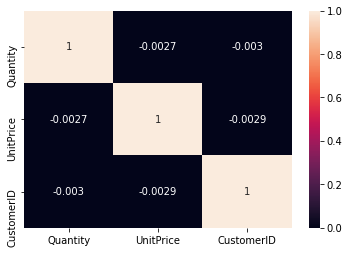

In [70]:
sns.heatmap(uk_data.corr(),annot=True)

In [ ]:
#Prediction model
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#Extract month and year from InvoiceDate.
uk_data['month_yr'] = uk_data['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))

In [ ]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_yr
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Dec-2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Dec-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Dec-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Dec-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Dec-2010


In [ ]:

sale=uk_data.pivot_table(index=['CustomerID'],columns=['month_yr'],values='UnitPrice',aggfunc='sum',fill_value=0).reset_index()

In [ ]:
sale.head()

month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011
0,12346.0,0.00,0.00,0.00,0.00,0.00,1.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12747.0,0.00,37.95,54.97,21.01,0.00,13.59,0.00,47.13,37.28,132.66,50.19,55.11,0.00
2,12748.0,730.96,398.91,1601.70,678.14,281.52,98.42,517.81,632.97,435.17,860.24,4540.43,539.94,889.39
3,12749.0,0.00,403.62,0.00,189.84,0.00,0.00,0.00,0.00,0.00,204.45,197.08,0.00,0.00
4,12820.0,0.00,0.00,0.00,27.65,0.00,17.89,0.00,0.00,0.00,0.00,0.00,42.13,24.71


In [ ]:
#Summing all the month sales
sale['CLV']=sale.iloc[:,2:].sum(axis=1)

In [ ]:
sale.head()

month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV
0,12346.0,0.00,0.00,0.00,0.00,0.00,1.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.04
1,12747.0,0.00,37.95,54.97,21.01,0.00,13.59,0.00,47.13,37.28,132.66,50.19,55.11,0.00,449.89
2,12748.0,730.96,398.91,1601.70,678.14,281.52,98.42,517.81,632.97,435.17,860.24,4540.43,539.94,889.39,11474.64
3,12749.0,0.00,403.62,0.00,189.84,0.00,0.00,0.00,0.00,0.00,204.45,197.08,0.00,0.00,994.99
4,12820.0,0.00,0.00,0.00,27.65,0.00,17.89,0.00,0.00,0.00,0.00,0.00,42.13,24.71,112.38


MULTI VARIABLE LINEAR REGRESSION

In [ ]:
#Selecting features
X=sale[['Dec-2011','Nov-2011', 'Oct-2011','Sep-2011','Aug-2011','Jul-2011']]
y=sale[['CLV']]

In [ ]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [ ]:
#Model development
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [ ]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[53.76936952]
[[0.71144409 1.27317992 0.73306334 1.24928657 1.58904694 3.13345521]]


In [ ]:
#Model fit
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))


R-Square: 0.816140150751684


In [ ]:
#Model evaluation
# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 102.72858064931792
MSE 34943.82161995939
RMSE: 186.93266600559514


In [ ]:
linreg.score(X_train,y_train)

0.9240075620153428

## single variable

In [ ]:
#Selecting features
X_uni=sale[['Dec-2011']]
y_uni=sale[['CLV']]

In [ ]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_uni, y_uni,random_state=0)

In [ ]:
#Model development
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg_uni = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg_uni.fit(X_uni, y_uni)

# make predictions on the testing set
y_pred = linreg_uni.predict(X_test)

In [ ]:
# print the intercept and coefficients
print(linreg_uni.intercept_)
print(linreg_uni.coef_)

[162.07426889]
[[8.3520151]]


In [ ]:
#Model fit
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))


R-Square: 0.1808574399537306


In [ ]:

linreg_uni.score(X_train,y_train)

0.7297852365369766

In [73]:
# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 202.54290836369577
MSE 155683.64499698338
RMSE: 394.56766846383067
